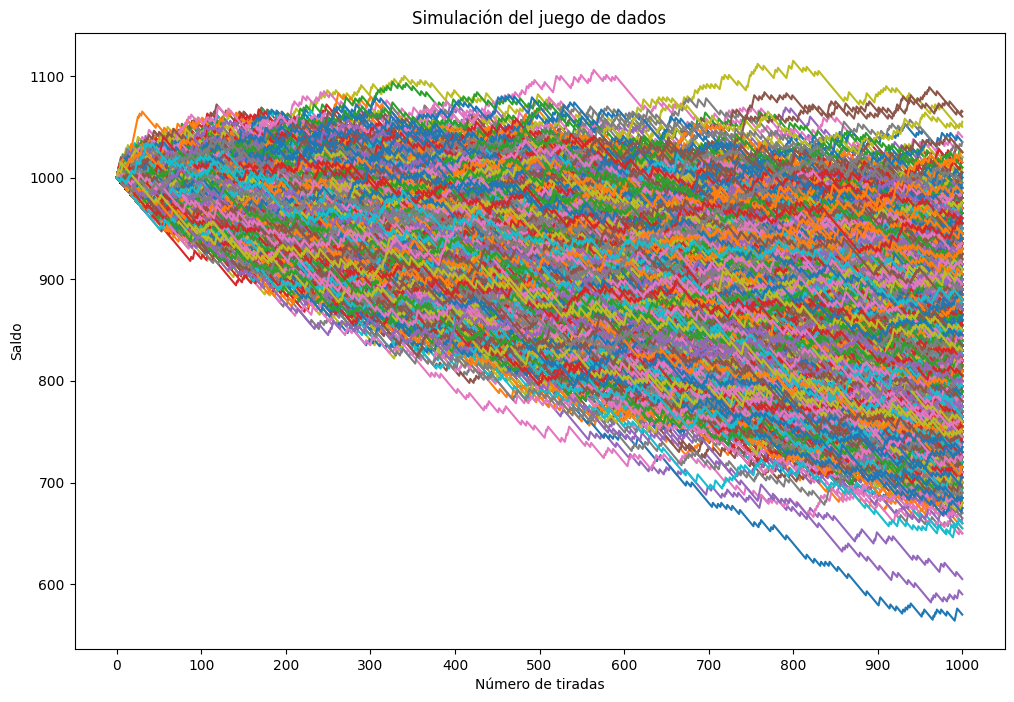

In [1]:
# Simulaciones Monte Carlo

# Importando paqueterias
import matplotlib.pyplot as plt
import random

# Función para lanzar dos dados y verificar si son iguales
def lanzamiento_dados():
  dado_1 = random.randint(1, 6)
  dado_2 = random.randint(1, 6)
  same_num = dado_1 == dado_2  # True si son iguales, False si no
  return dado_1, dado_2, same_num

# Entradas
num_simulaciones = 10000 #<COMPLETA>
max_num_tiradas = 1000 #<COMPLETA>
apuesta = 1 #<COMPLETA>

# Seguimiento
prob_ganar = [] #<COMPLETA>
balance_final = [] #<COMPLETA>

# Configuración de la figura
fig = plt.figure(figsize=(12,8))   #<COMPLETA>
plt.xticks(range(0, max_num_tiradas + 250, 100))
plt.yticks(range(0, 1150, 100))
plt.xlabel("Número de tiradas") #<COMPLETA>
plt.ylabel("Saldo") #<COMPLETA>
plt.title("Simulación del juego de dados") #<COMPLETA>
for i in range(num_simulaciones):
    saldo = 1000 #<COMPLETA>
    num_tiradas = [0] #<COMPLETA>
    num_victorias = 0 #<COMPLETA>
    saldos = [saldo]

    while num_tiradas[-1] < max_num_tiradas:
        if lanzamiento_dados()[2]:
            saldo += 4 * apuesta
            num_victorias += 1
        else:
            saldo -= apuesta
        num_tiradas.append(num_tiradas[-1] + 1)
        saldos.append(saldo)
        #<COMPLETA>
    prob_ganar.append(num_victorias / num_tiradas[-1])
    balance_final.append(saldo)

    plt.plot(num_tiradas, saldos)  #<COMPLETA>

In [2]:
# Promedio general
prob_victoria_general = sum(prob_ganar) / num_simulaciones #<COMPLETA>
saldo_final_general = sum(balance_final) / num_simulaciones #<COMPLETA>

print("Promedio de victorias después de",num_simulaciones, "simulaciones:", round(prob_victoria_general, 2)) #<COMPLETA>)
print("Saldo promedio después de", num_simulaciones, "simulaciones:", round(saldo_final_general, 2)) #<COMPLETA>)

Promedio de victorias después de 10000 simulaciones: 0.17
Saldo promedio después de 10000 simulaciones: 833.59


### Desafío complementario

🎲 Escenario Original
Probabilidad promedio de victoria: 0.1696
Saldo promedio final: $984.83

🎲 Escenario Modificado
Probabilidad promedio de victoria: 0.1667
Saldo promedio final: $849.97


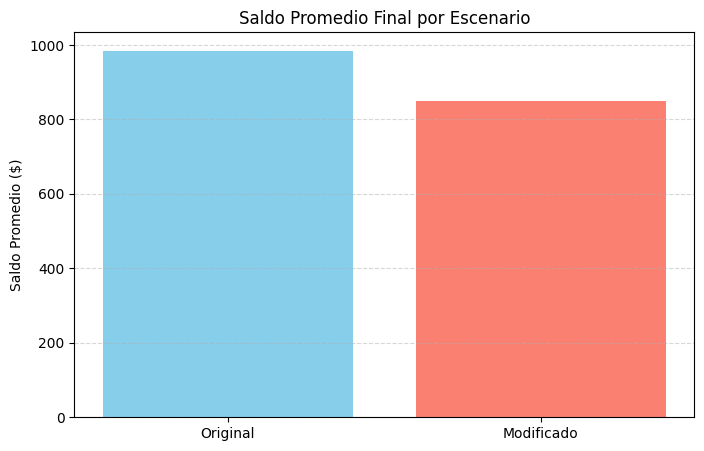

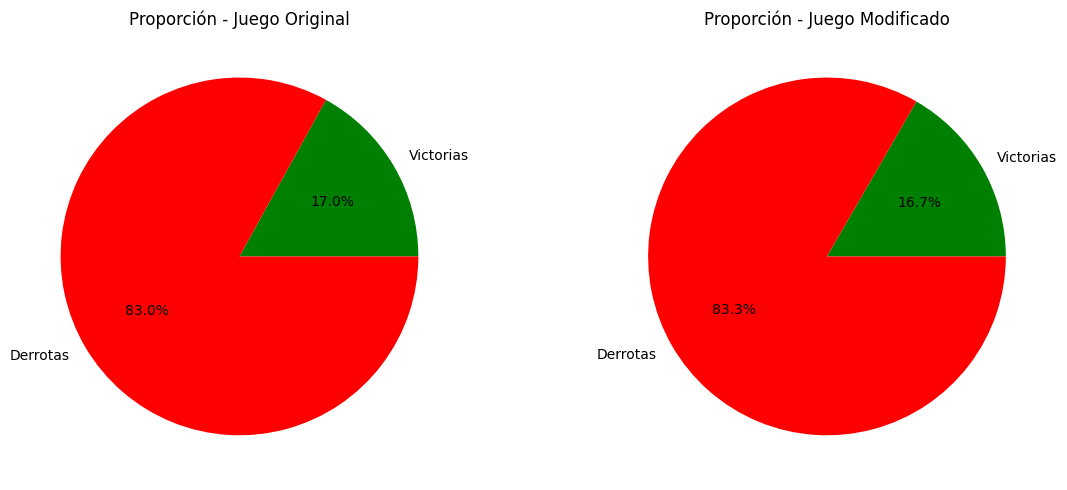

In [3]:
import matplotlib.pyplot as plt
import random

# Función para lanzar dos dados y verificar si son iguales
def roll_dice():
    return random.randint(1, 6) == random.randint(1, 6)

# Simulación general de un escenario
def simulate_game(num_simulations, max_num_rolls, bet, payout, starting_balance):
    win_probability = []
    end_balance = []
    total_wins = 0
    total_losses = 0

    for _ in range(num_simulations):
        balance = starting_balance
        wins = 0

        for _ in range(max_num_rolls):
            if roll_dice():
                balance += bet * payout
                wins += 1
            else:
                balance -= bet

        losses = max_num_rolls - wins
        total_wins += wins
        total_losses += losses
        win_probability.append(wins / max_num_rolls)
        end_balance.append(balance)

    avg_win_prob = sum(win_probability) / num_simulations
    avg_balance = sum(end_balance) / num_simulations
    return avg_win_prob, avg_balance, total_wins, total_losses

# Parámetros del experimento
num_simulations = 200
max_num_rolls = 100

# Escenario original
orig_win_prob, orig_balance, orig_wins, orig_losses = simulate_game(
    num_simulations=num_simulations,
    max_num_rolls=max_num_rolls,
    bet=1,
    payout=4,
    starting_balance=1000
)

# Escenario modificado
mod_win_prob, mod_balance, mod_wins, mod_losses = simulate_game(
    num_simulations=num_simulations,
    max_num_rolls=max_num_rolls,
    bet=3,
    payout=6,
    starting_balance=800
)

# Mostrar resultados
print("🎲 Escenario Original")
print(f"Probabilidad promedio de victoria: {round(orig_win_prob, 4)}")
print(f"Saldo promedio final: ${round(orig_balance, 2)}")

print("\n🎲 Escenario Modificado")
print(f"Probabilidad promedio de victoria: {round(mod_win_prob, 4)}")
print(f"Saldo promedio final: ${round(mod_balance, 2)}")

# Gráfica de barras: saldo promedio
labels = ['Original', 'Modificado']
balances = [orig_balance, mod_balance]

plt.figure(figsize=(8, 5))
plt.bar(labels, balances, color=['skyblue', 'salmon'])
plt.title("Saldo Promedio Final por Escenario")
plt.ylabel("Saldo Promedio ($)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# Gráfica de pastel: proporción de victorias
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].pie([orig_wins, orig_losses], labels=["Victorias", "Derrotas"],
            autopct='%1.1f%%', colors=['green', 'red'])
axes[0].set_title("Proporción - Juego Original")

axes[1].pie([mod_wins, mod_losses], labels=["Victorias", "Derrotas"],
            autopct='%1.1f%%', colors=['green', 'red'])
axes[1].set_title("Proporción - Juego Modificado")

plt.tight_layout()
plt.show()